In [2]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import cv2

#read the data
with open(r'..\documents\hand_writting.csv' , 'r') as f:
    result = csv.reader(f)
    rows = []
    
    for row in result:
        rows.append(row)
        
    

In [3]:
#print the data row
print(rows[0])

#each pic has 28 pixels
#There are 26 classes for A:Class0 to Z:Class26
print(np.shape(rows)) 

#matrix with 372451 rows and 785 columns  
#372451: number of characters
#each character have 10000 samples
#785: 1 class + 784 pixels 


['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '32', '215', '235', '43', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '130', '255', '255', '107', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '14', '227', '255', '255', '107', '0', '0', '0', '0', '0', '0', '0', '0', '

0


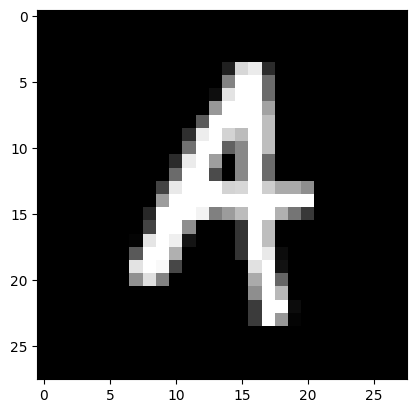

0


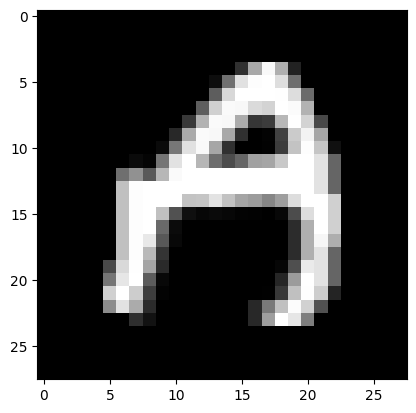

1


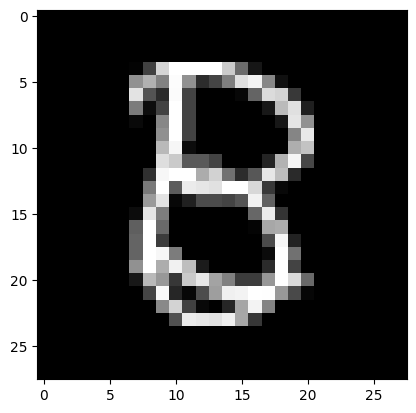

In [43]:
def print_letter(letter):
    x = np.array([int(j) for j in letter[1:]])
    x = x.reshape(28,28)
    plt.imshow(x, cmap='gray')
    
#Print out to test a letter
letter = rows[0] 

for i in range(3):
    print(rows[i*10000][0])
    print_letter(rows[i*10000])
    plt.show()


In [58]:
#testing for first 4 letters

#training dataset
train_data = []
#training labels
train_labels = []

def reshape_letter(letter):
    x = np.array([int(j) for j in letter[1:]])
    x = x.reshape(28,28)
    return x

for letter in rows:
    if(letter[0] == '0' or letter[0] == '1' or letter[0] == '2' or letter[0] == '3'):
        x = reshape_letter(letter)
        train_data.append(x)
        train_labels.append(int(letter[0]))
    else:
        break
    

In [62]:
print("Number of training data for letters A B C D: ")
print(len(train_labels)) #res = 56081
#print(train_data[0])

Number of training data for letters A B C D: 
56081


In [76]:
import random

shuffle_order = list(range(56081))
random.shuffle(shuffle_order)
print(shuffle_order)

train_data = np.array(train_data)
train_labels = np.array(train_labels) #ABCD

train_data = train_data[shuffle_order]
train_labels = train_labels[shuffle_order]


[51985, 13713, 48655, 8612, 30872, 18959, 108, 6759, 47193, 53756, 5973, 22629, 96, 51860, 16046, 23962, 8022, 32456, 53978, 26893, 48361, 54551, 25592, 54733, 35963, 28422, 3149, 15296, 49831, 55595, 49470, 19837, 29639, 48350, 11256, 25322, 26604, 5710, 21757, 14929, 36083, 30979, 33125, 51126, 18305, 51744, 48904, 36044, 46545, 48508, 12468, 11871, 53257, 33515, 47627, 53428, 54731, 7991, 42799, 29820, 48946, 24460, 15865, 3876, 16027, 31431, 20432, 25975, 38173, 3749, 18113, 29907, 15976, 18784, 35337, 16641, 51122, 46781, 26916, 18397, 47085, 44572, 17859, 25643, 27763, 37383, 4214, 55445, 34274, 41010, 24699, 31966, 22230, 27327, 31346, 7966, 53258, 2697, 23550, 31619, 11336, 24498, 28127, 13857, 28974, 17304, 12856, 10038, 34544, 32148, 26914, 41747, 2459, 6996, 35094, 49595, 19272, 47493, 22594, 6828, 30776, 53627, 30683, 40650, 45952, 54326, 11387, 23652, 20778, 36960, 18636, 37235, 33828, 5580, 2443, 22440, 50546, 15001, 48500, 17649, 36993, 41255, 19153, 15406, 27023, 13263,

In [77]:
#traing, testing and validation data
#training data
train_data = train_data[:40000]
train_labels = train_labels[:40000]

#validation data
val_data = train_data[40000:50000]
val_labels = train_labels[40000:50000]

#testing data
test_data = train_data[50000:]
test_labels = train_labels[50000:]
